In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
vistas_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
generos_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
educacion_raw = pd.read_csv('../data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')

## Preguntas
* **Avisos con más postulaciones**
* **Relación vistas/postulaciones para un mismo aviso**
* **Distribución horaria de postulaciones**
* **Distribución postulaciones por día**
* **Distribución postulaciones por género**
* **Correlación usuario-postulaciones** - analizar si un mismo usuario se postula a avisos del mismo área o no

In [3]:
print(postulaciones_raw.info())
print('---------------------------------')
postulaciones_raw.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB
None
---------------------------------


,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34


**Limpieza y transformaciones**

In [4]:
postulaciones_raw.isna().any()

idaviso             False
idpostulante        False
fechapostulacion    False
dtype: bool

In [5]:
postulaciones = postulaciones_raw.rename(columns={'fechapostulacion':'fecha'})

In [6]:
postulaciones['fecha'] = pd.to_datetime(postulaciones.fecha)

In [7]:
postulaciones.dtypes

idaviso                  int64
idpostulante            object
fecha           datetime64[ns]
dtype: object

**Análisis**

In [8]:
# TOP avisos con más postulaciones
data = pd.merge(postulaciones,avisos_raw[['idaviso','titulo','nombre_area']], on='idaviso')
print(data.isna().any())
data.head(1)

idaviso         False
idpostulante    False
fecha           False
titulo          False
nombre_area     False
dtype: bool


,idaviso,idpostulante,fecha,titulo,nombre_area
0,1112257047,NM5M,2018-01-15 16:22:34,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,Atención al Cliente


In [9]:
top_post = data.idaviso.value_counts().reset_index().rename(columns={'idaviso':'count','index':'idaviso'})

In [10]:
data.idaviso.value_counts().head(3)

1112033906    9932
1112334791    9787
1112204682    9244
Name: idaviso, dtype: int64

In [11]:
top_post.head(3)

,idaviso,count
0,1112033906,9932
1,1112334791,9787
2,1112204682,9244


In [12]:
avisos_raw[avisos_raw.idaviso == 1112334791]

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
13003,1112334791,1,Cajero/a - Part Time,<p>Te estamos buscando para formar parte de un...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,Farmacity


In [13]:
seleccion = avisos_raw.idaviso.isin(top_post.idaviso)
top_post['titulo'] = avisos_raw.loc[seleccion,'titulo'].values
top_post['area'] = avisos_raw.loc[seleccion,'nombre_area'].values
top_post.head(3)

,idaviso,count,titulo,area
0,1112033906,9932,VENDEDOR/A PROVINCIA DE SANTA FE,Comercial
1,1112334791,9787,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,Transporte
2,1112204682,9244,Vendedor Viajante TUCUMAN/SANTIAGO DEL ESTERO,Ventas


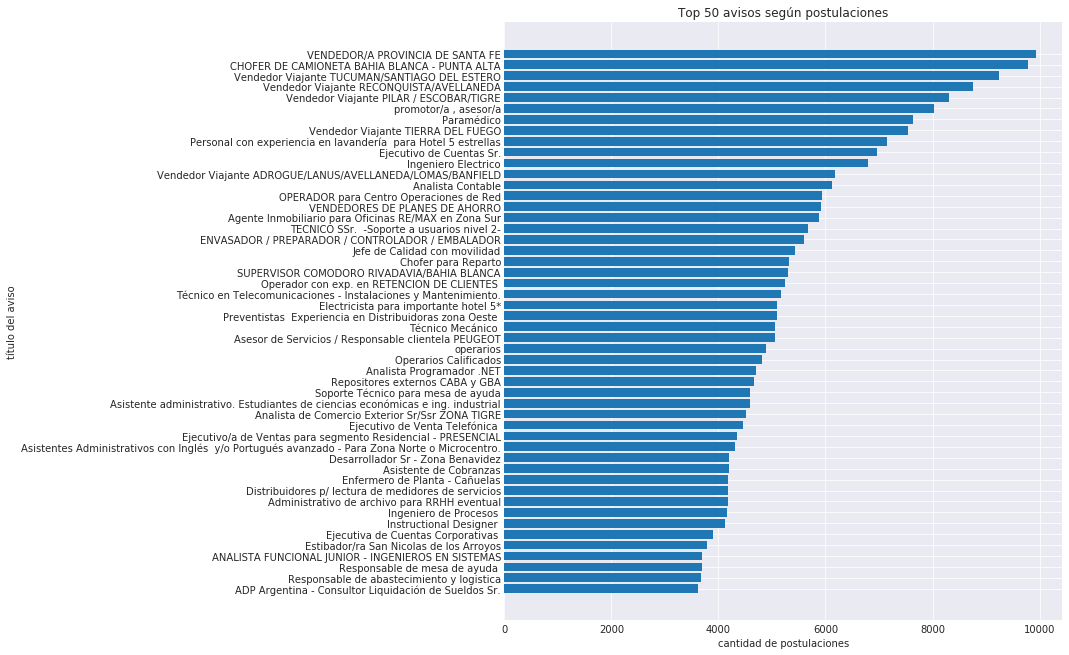

In [29]:
plot_data = top_post[['titulo','count']].head(50).iloc[::-1]
plt.figure(figsize=(10,11))
plt.title('Top 50 avisos según postulaciones')
plt.barh(plot_data['titulo'], plot_data['count'])
plt.xlabel('cantidad de postulaciones')
plt.ylabel('título del aviso')
plt.show()